# Abalone Age prediction

### Project Description

### Importing supporting libraries

In [1]:
import pandas as pd
import numpy as np

### Importing dataset

In [2]:
df=pd.read_csv('C:\\Users\\PSPK\\OneDrive\\Desktop\\Sandeep\\data\\abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### Checking filesize

In [3]:
df.shape

(4177, 9)

### Checking file info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


### Checking for null values in the dataset

In [6]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

### Checking statistical summary

In [7]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000



### Introducing new attribute age by adding rings +1.5

In [8]:
df['age'] = df.Rings + 1.5
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


### Droping rings column

In [8]:
df.drop(columns=['Rings'],axis=1,inplace=True)

In [9]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


### Categorical feature analysis

In [10]:
df.Sex.value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

<AxesSubplot:ylabel='Sex'>

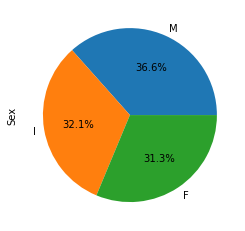

In [11]:
# Ploting categorical features with the help of a pie chart
df.Sex.value_counts().plot(kind='pie',autopct='%1.1f%%',)

In [12]:
# Encoding sex column for ML purpose
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.Sex=le.fit_transform(df.Sex)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


### Distribution plot for all features

array([[<AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>],
       [<AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>,
        <AxesSubplot:title={'center':'Shucked weight'}>],
       [<AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Rings'}>],
       [<AxesSubplot:title={'center':'age'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

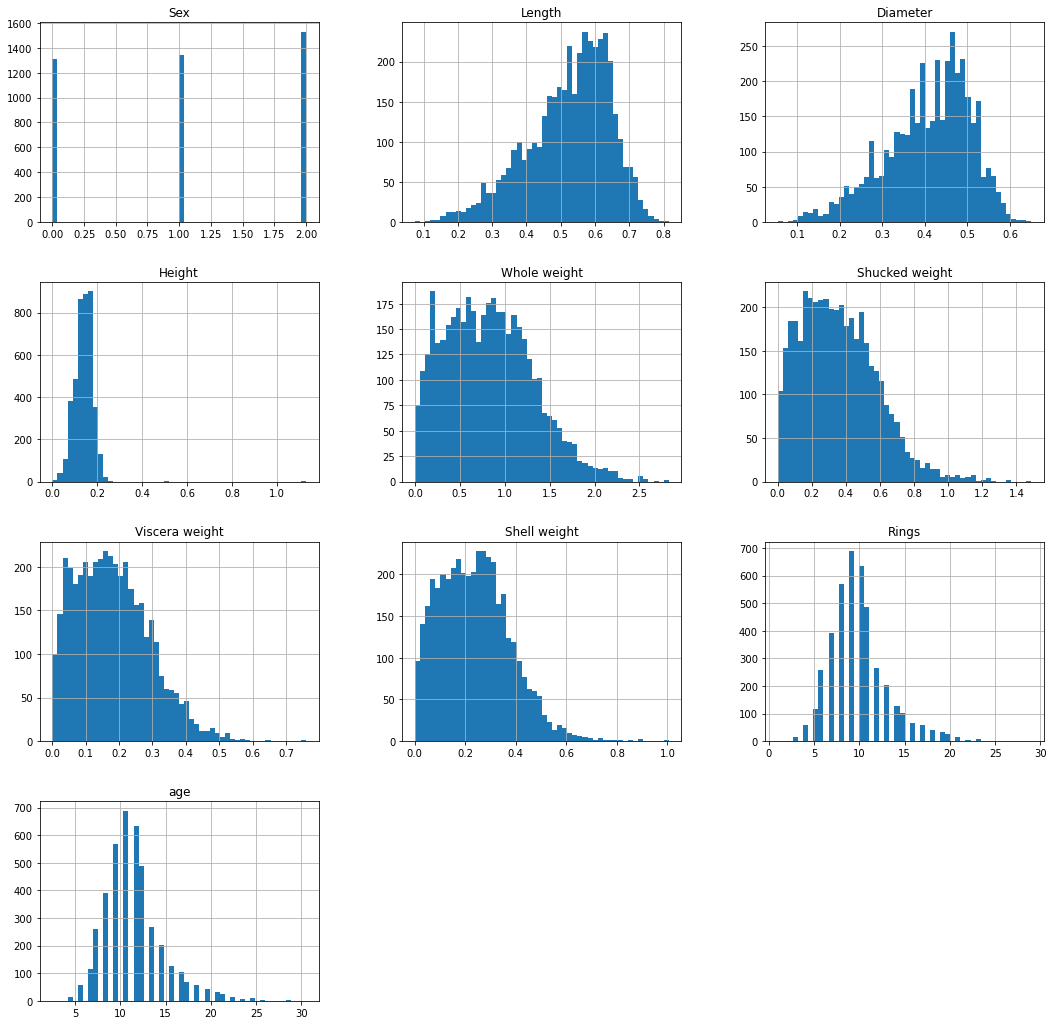

In [13]:
import seaborn as sns
df.hist(bins=50, figsize=(18,18))

### Checking Age distribution graph, as it is our target

C:\Users\PSPK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

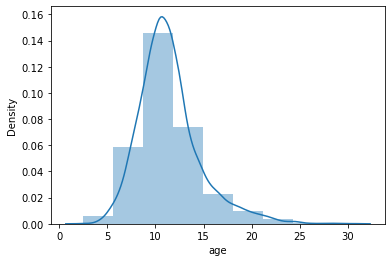

In [14]:
sns.distplot(df.age,bins=9)

### Pairplot-Bivariate analysis

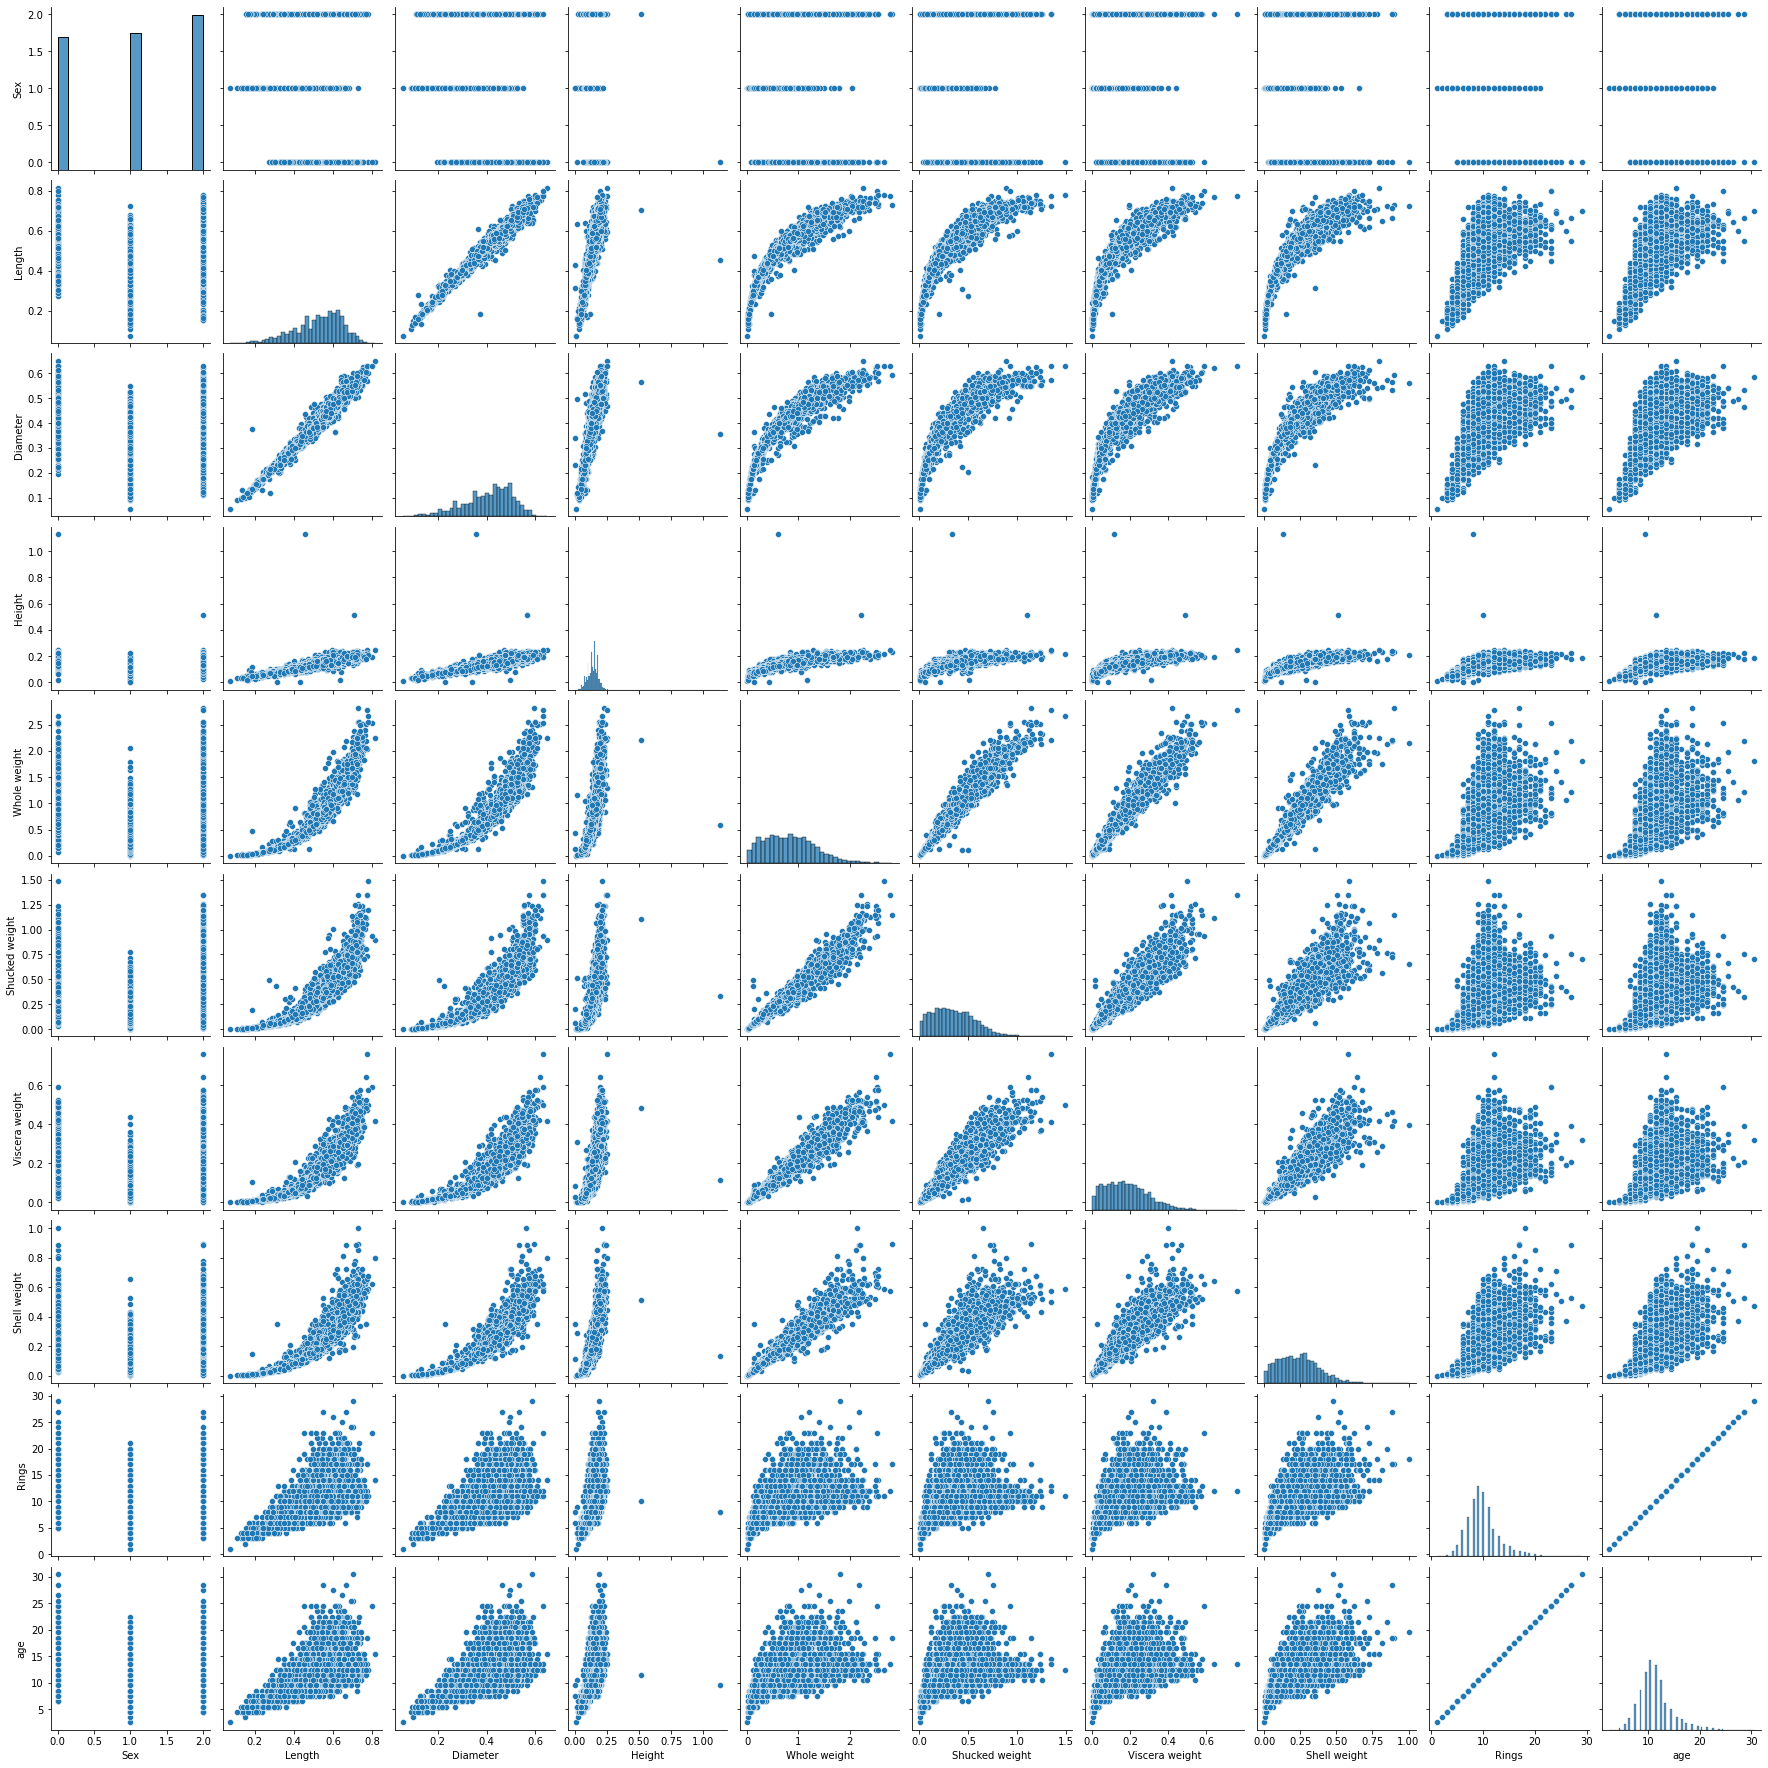

In [15]:
sns.pairplot(df)

### Checking feature's correlation with target

In [16]:
corre=df.corr().age.sort_values(ascending=False)
corre

Rings             1.000000
age               1.000000
Shell weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Shucked weight    0.420884
Sex              -0.034627
Name: age, dtype: float64

### Correlation Graph

<AxesSubplot:>

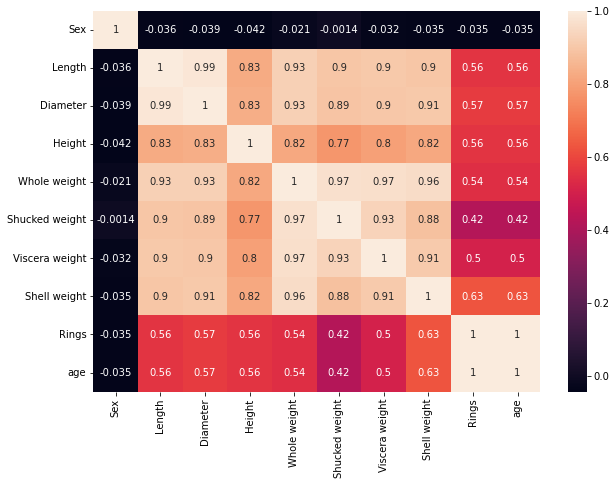

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)

### Checking Outliers in features

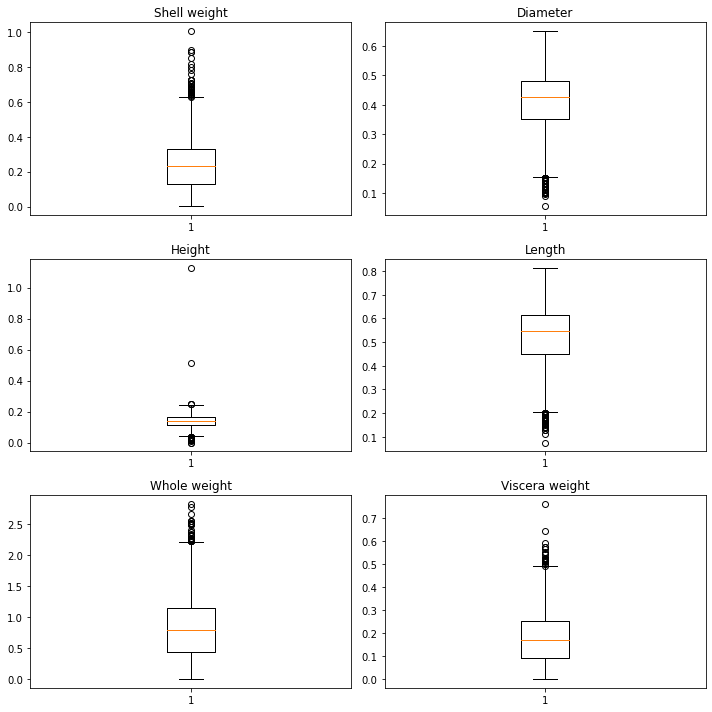

In [18]:
# outlier checking
fig, ax = plt.subplots(3, 2,figsize=(10,10))

ax[0, 0].boxplot(df['Shell weight'])
ax[0, 1].boxplot(df.Diameter)
ax[1, 0].boxplot(df.Height)
ax[1, 1].boxplot(df.Length)
ax[2, 0].boxplot(df['Whole weight'])
ax[2, 1].boxplot(df['Viscera weight'])


ax[0, 0].set_title("Shell weight")
ax[0, 1].set_title("Diameter")
ax[1, 0].set_title("Height")
ax[1, 1].set_title("Length")
ax[2, 0].set_title("Whole weight")
ax[2, 1].set_title("Viscera weight")


fig.tight_layout()
plt.show()

### splitting independant variable X and dependant variable y

In [19]:
X=df.iloc[:,:-1]
X.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [20]:
y=df.age
y.head()

0    16.5
1     8.5
2    10.5
3    11.5
4     8.5
Name: age, dtype: float64

### Scaling

In [29]:
from sklearn.preprocessing import scale
X_scaled=pd.DataFrame (scale(X), columns=X.columns)
X_scaled.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1.151980,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544
1,1.151980,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013
2,-1.280690,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624
3,1.151980,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571
4,-0.064355,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013


### train test split

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)

In [31]:
X_train.shape

(2923, 9)

In [32]:
y_train.shape

(2923,)

In [33]:
X_test.shape

(1254, 9)

In [34]:
y_test.shape

(1254,)

## Machine Learning Modeling 

## 1.Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(X_train,y_train)

LinearRegression()

In [36]:
y_predict1=model1.predict(X_test)

In [37]:
from sklearn.metrics import r2_score
test_score=r2_score(y_test, y_predict1)
test_score

1.0

In [38]:
train_score=model1.score(X_train,y_train)
train_score

1.0

In [39]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_predict1))
print('MSE:', metrics.mean_squared_error(y_test,y_predict1 ))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_predict1)))

MAE: 3.4833026061285613e-15
MSE: 1.884962373528102e-29
RMSE: 4.3416153370929835e-15


### Checking the accuracy btw actual & predicted ages

In [40]:
lr_age= pd.DataFrame({'Actual_age':y_test,'Predicted_age':y_predict1})
lr_age.head()

,Actual_age,Predicted_age
17,11.5,11.5
1131,9.5,9.5
299,10.5,10.5
1338,11.5,11.5
2383,17.5,17.5


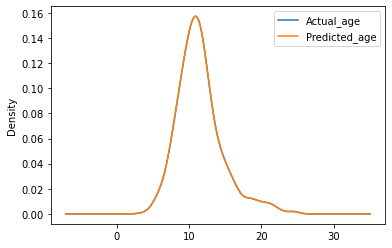

In [48]:
# Density plot for lr

lr_reg = lr_age.plot.kde()

## 2.Random ForestRegressor

In [41]:
from sklearn.ensemble import RandomForestRegressor
model2=RandomForestRegressor(n_estimators=100,random_state=0)
model2.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [42]:
y_predict2 = model2.predict(X_test)
rf=r2_score(y_test, y_predict2)
rf

0.9998922230466231

In [43]:
training_score=model2.score(X_train,y_train)
training_score

0.9999310794671201

In [44]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_predict2))
print('MSE:', metrics.mean_squared_error(y_test,y_predict2 ))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_predict2)))

MAE: 0.0015470494417862799
MSE: 0.0010837320574162655
RMSE: 0.03292008592662336


In [46]:
rf_age= pd.DataFrame({'Actual_age':y_test,'Predicted_age':y_predict2})
rf_age.head()

,Actual_age,Predicted_age
17,11.5,11.5
1131,9.5,9.5
299,10.5,10.5
1338,11.5,11.5
2383,17.5,17.5


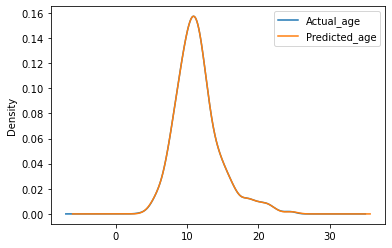

In [47]:
# Density plot for lr

lr_reg = rf_age.plot.kde()

In [48]:
import pickle
pickle.dump(model1, open('abalone1.pkl','wb'))